# Foundations of AI & ML
## Session 06
### Experiment 3 - Part 2
### Applying isomap on Swiss roll data

#### we will be generating the Swiss roll data as we have done in part 0

In [1]:
### importing the required packages
from sklearn.datasets import *
from sklearn import manifold
import matplotlib.pyplot as plt

#### Generating the data

In [2]:
n_samples = 1500
X, color = make_swiss_roll(n_samples)

#### Let us apply isomap on the data

In [4]:
iso = manifold.Isomap(n_neighbors=6, n_components=2)
iso.fit(X)
manifold_data = iso.transform(X)

In [5]:
manifold_data.shape

(1500, 2)

#### Let us plot the data

In [9]:
X

array([[ -0.44356546,  13.8248094 , -10.94609016],
       [  3.66058114,  16.20271452,   6.35186684],
       [  0.38592495,   6.50751119,   7.79496488],
       ...,
       [  5.63992885,  10.3024195 ,  -1.91433623],
       [ -8.92359985,  16.45697755,  -4.20626018],
       [ 10.65848714,   3.64421506,  -5.67862821]])

<IPython.core.display.Javascript object>


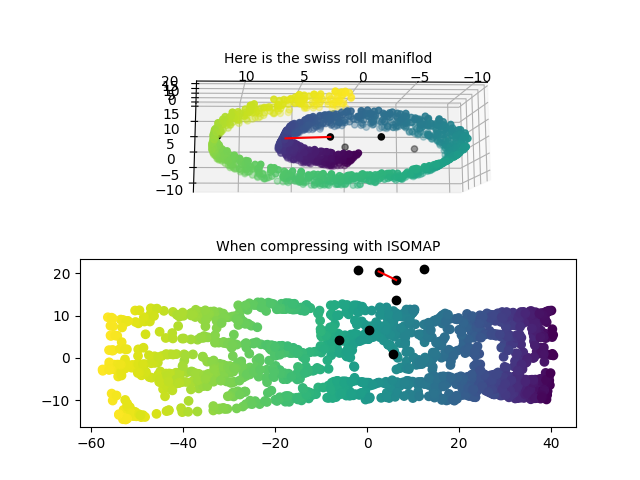

In [6]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1,projection='3d')
ax.set_title('Here is the swiss roll maniflod', fontsize=10)
ax.scatter(X[:,0],X[:,1],X[:,2],c = color)
x = X[:,0][2:10]
y = X[:,1][2:10]
ax.scatter(x,y,c = "black")
ax.plot(x[2:4],y[2:4],c = "red")
ax = fig.add_subplot(2, 1, 2) 
ax.set_title('When compressing with ISOMAP', fontsize=10)
ax.scatter(manifold_data[:,0],manifold_data[:,1],c = color)
x = X[:,0][2:10]
y = X[:,1][2:10]
ax.scatter(x,y,c = "black")
ax.plot(x[2:4],y[2:4],c = "red")
plt.show()

#### Now let us generate swiss roll data for 300 samples with some noise in it

In [10]:
noise = 0.01*200 
n_samples = 300
ndata,colors = make_swiss_roll(n_samples,noise)

In [11]:
ndata.shape

(300, 3)

#### Lets concatenate the noise data values and original data values

In [12]:
import numpy as np
con_data =  np.concatenate((X, ndata), axis=0)
con_colors = np.concatenate((color,colors),axis=0)

In [13]:
con_data

array([[ -0.44356546,  13.8248094 , -10.94609016],
       [  3.66058114,  16.20271452,   6.35186684],
       [  0.38592495,   6.50751119,   7.79496488],
       ...,
       [  9.4820292 ,   0.21591111,  -2.97248534],
       [  3.69281704,   9.66496469,   7.5623919 ],
       [ 10.41711315,  17.93743953,  -2.08532535]])

In [16]:
con_data.shape

(1800, 3)

In [17]:
## Let us apply isomap on this data
iso = manifold.Isomap(n_neighbors=6, n_components=2)
iso.fit(con_data)
manifold_data = iso.transform(con_data)

In [25]:
manifold_data.shape

(1800, 2)

#### Let us plot the data

<IPython.core.display.Javascript object>


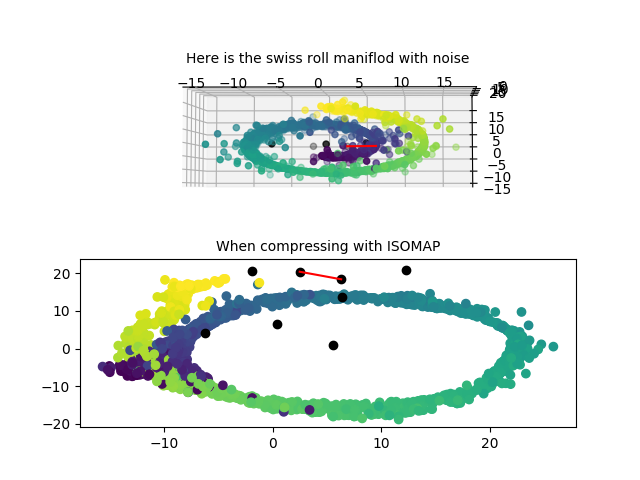

In [18]:

from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1,projection='3d')
ax.set_title('Here is the swiss roll maniflod with noise', fontsize=10)
ax.scatter(con_data[:,0],con_data[:,1],con_data[:,2],c = con_colors)
x = X[:,0][2:10]
y = X[:,1][2:10]
ax.scatter(x,y,c = "black")
ax.plot(x[2:4],y[2:4],c = "red")
ax = fig.add_subplot(2, 1, 2) 
ax.set_title('When compressing with ISOMAP', fontsize=10)
ax.scatter(manifold_data[:,0],manifold_data[:,1],c = con_colors)
x = X[:,0][2:10]
y = X[:,1][2:10]
ax.scatter(x,y,c = "black")
ax.plot(x[2:4],y[2:4],c = "red")
plt.show()

**Excerise 1 :** Pan and Zoom to observe the plots

**Summary:**  ISOMAP has the basic idea of preserve geodesic distance as measured along the manifold, hence can flatten (unroll) the swiss roll. Notice that Isomap connects nearby points and hence preserves the geodesic distances. This makes it prone to "short-circuit errors" in which due to noise, the nearest neighbours change and the dimensionality reduction fails due to this extra connectivity. This is illustrated by it failing to unroll the swiss roll.